# Car Price Prediction Multiple Linear Regression

## Data Understanding
This step is necessary for us to understand the data that we are going to deal with our model. Understanding the types of features and samples are necessary for data processing for it to be effective in the later stages of developing our model.

### Import Libraries

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_error

### Load Dataset

In [50]:
pd.set_option('display.max_columns', None) #This is use to display full columns
pd.set_option('future.no_silent_downcasting', True) # Future downcasting behavior globally
cars = pd.read_csv('CarPrice_Assignment.csv')
cars.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


### Reviewing the Dataset

#### 1. Determine the dimension of the dataset

In [51]:
rows, columns = cars.shape
print(f"Number of rows: {rows}")
print(f"Number of columns: {columns}")

Number of rows: 205
Number of columns: 26


#### 2. Analyze the dataset information

In [52]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

#### 3. Convert "symboling" as catergorical data
After referring to the data dictionary, symbolling is a categorical data so we need to convert it. 

In [53]:
cars['symboling'] = cars['symboling'].astype('object')

#### 3. Determine continuous and categorical features of your dataset
Categorical: object <br>
Numerical: float64, int64

In [54]:
categorical = cars.select_dtypes(include=['object']).columns
continuous = cars.select_dtypes(include=['float64', 'int64']).columns

print(f"Number of categorical features: {len(categorical)}")
print(f"Number of continuous features: {len(continuous)}")

Number of categorical features: 11
Number of continuous features: 15


In [55]:
print("\nCategorical Features:")
print(categorical)
print("\nContinuous Features:")
print(continuous)


Categorical Features:
Index(['symboling', 'CarName', 'fueltype', 'aspiration', 'doornumber',
       'carbody', 'drivewheel', 'enginelocation', 'enginetype',
       'cylindernumber', 'fuelsystem'],
      dtype='object')

Continuous Features:
Index(['car_ID', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')


#### 4. Categorical Data Descriptions

In [56]:
cars.describe(include='object')

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
count,205,205,205,205,205,205,205,205,205,205,205
unique,6,147,2,2,2,5,3,2,7,7,8
top,0,peugeot 504,gas,std,four,sedan,fwd,front,ohc,four,mpfi
freq,67,6,185,168,115,96,120,202,148,159,94


#### 5. Continuous Data Descriptions

In [57]:
cars.describe(include=['float64', 'int64']).round(2)

,car_ID,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00
mean,103.00,98.76,174.05,65.91,53.72,2555.57,126.91,3.33,3.26,10.14,104.12,5125.12,25.22,30.75,13276.71
std,59.32,6.02,12.34,2.15,2.44,520.68,41.64,0.27,0.31,3.97,39.54,476.99,6.54,6.89,7988.85
min,1.00,86.60,141.10,60.30,47.80,1488.00,61.00,2.54,2.07,7.00,48.00,4150.00,13.00,16.00,5118.00
25%,52.00,94.50,166.30,64.10,52.00,2145.00,97.00,3.15,3.11,8.60,70.00,4800.00,19.00,25.00,7788.00
50%,103.00,97.00,173.20,65.50,54.10,2414.00,120.00,3.31,3.29,9.00,95.00,5200.00,24.00,30.00,10295.00
75%,154.00,102.40,183.10,66.90,55.50,2935.00,141.00,3.58,3.41,9.40,116.00,5500.00,30.00,34.00,16503.00
max,205.00,120.90,208.10,72.30,59.80,4066.00,326.00,3.94,4.17,23.00,288.00,6600.00,49.00,54.00,45400.00


#### 6. Checking if there are NaN Values in the Dataset

In [58]:
cars.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

#### 7. Checking for Duplicate Values

In [59]:
print(f"Duplicate entries in the dataset are {(cars.duplicated().sum())}")

Duplicate entries in the dataset are 0


#### 8. Show Dataset with Categroical Data Only

In [60]:
cars.select_dtypes(include='object').head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,ohc,four,mpfi
4,2,audi 100ls,gas,std,four,sedan,4wd,front,ohc,five,mpfi


#### 9. Show Dataset with Continuous Data Only

In [61]:
cars.select_dtypes(include=['float64', 'int64']).head()

,car_ID,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0


## Data Cleaning
This step is necessary to be done for us to make corrections on the errors in our datasets. This is for us to prepare our dataset for the data visualization/exploratory data analysis (EDA).

#### 1. Cleaning CarName Feature

Separating the Company Name and the Car Model from the CarName Feature

In [62]:
cars['CompanyName'] = cars['CarName'].apply(lambda x: x.split(" ")[0])

#### 2. Dropping CarName column inplace of the CompanyName

In [63]:
cars.drop(columns='CarName', inplace=True)
cars.head()

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CompanyName
0,1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,2,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,3,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,4,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,5,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


In [64]:
cars.insert(0, 'CompanyName', cars.pop('CompanyName'))
cars.head()

,CompanyName,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,alfa-romero,1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,alfa-romero,2,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,alfa-romero,3,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,audi,4,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,audi,5,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


#### 3. Inspecting CopmanyName Feature

In [65]:
cars['CompanyName'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

#### 4. Fixing Mispelled Company Names

There are some names that need to be fixing and the data entries that needed fixing is as follows:

- maxda -> mazda
- Nissan -> nissan
- porcshce -> porsche
- toyouta -> toyota
- vokswagen & vw -> volkswagen

In [66]:
cars['CompanyName'].replace({
    'maxda': 'mazda',
    'Nissan': 'nissan',
    'porcshce': 'porsche',
    'toyouta': 'toyota',
    'vokswagen': 'volkswagen',
    'vw': 'volkswagen'
}, inplace=True)
cars['CompanyName'].unique()

C:\Users\saloj\AppData\Local\Temp\ipykernel_12920\2246581534.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  cars['CompanyName'].replace({


array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

## Data Visualzation / Exploratory Data Analysis (EDA)
This is a necessary step due to the data having some entries that needs to be processed. Also, we need to analyze the given dataset so we can evaluate what specific variables *correlates* to our *dependent variable* (price).

#### 1. Visualizing the Independent Variable (Price)

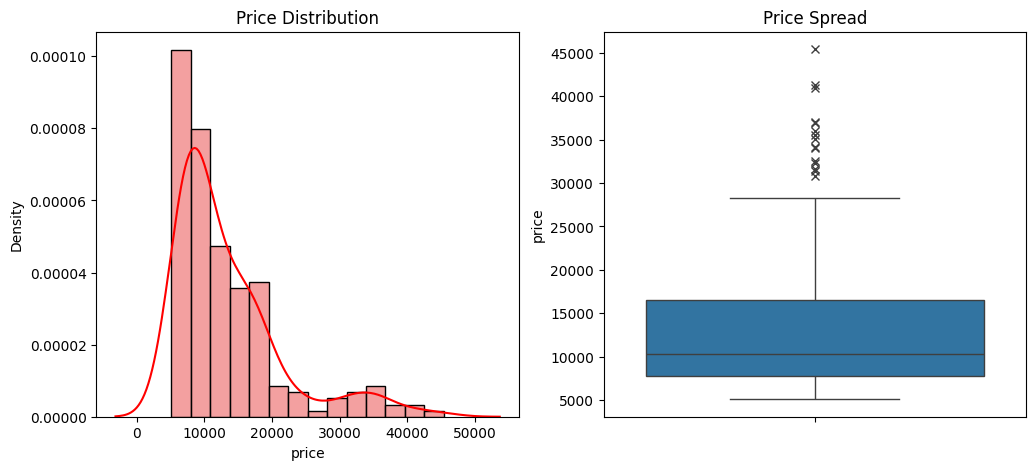

In [67]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(cars['price'], stat="density", color="lightcoral")
sns.kdeplot(cars['price'], color="red", bw_adjust=1, label="KDE Curve")
plt.title('Price Distribution')

plt.subplot(1,2,2)
plt.title('Price Spread')
sns.boxplot(y=cars['price'], flierprops={"marker": "x"})

plt.show()

#### 2. Visualizing Categorical Data

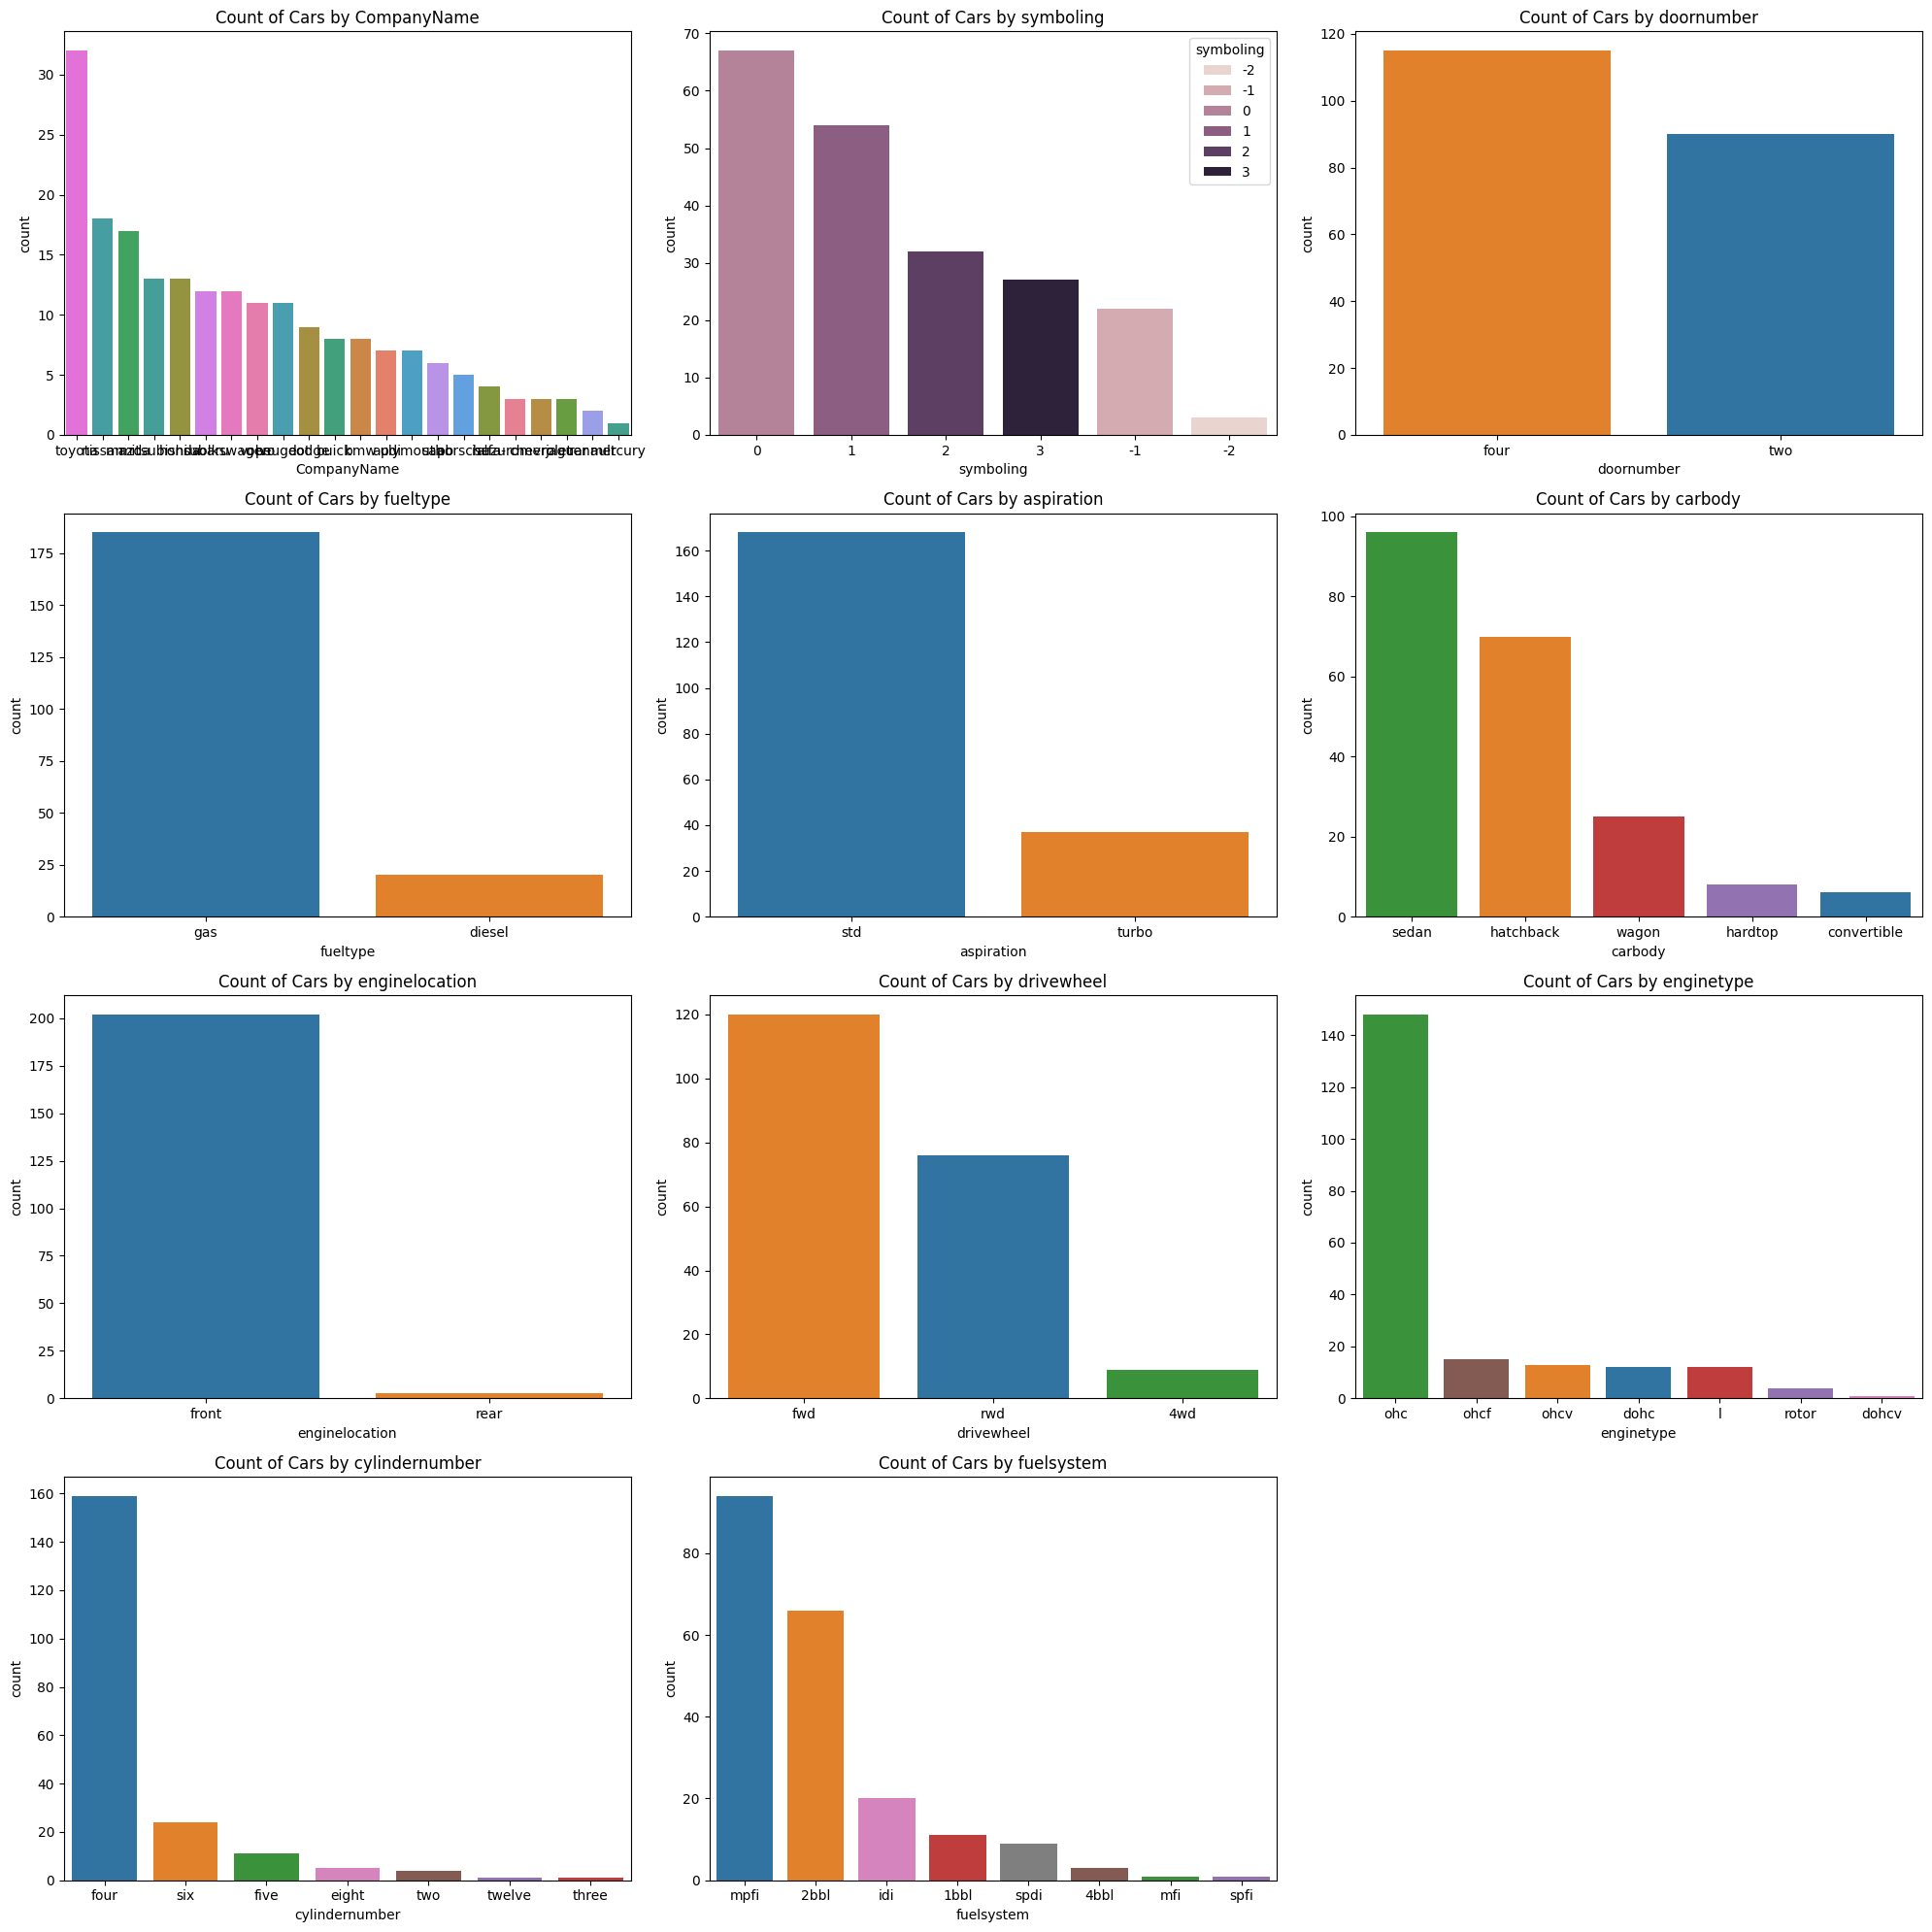

In [68]:
categorical_features = ['CompanyName', 'symboling', 'doornumber', 'fueltype', 'aspiration', 
                        'carbody', 'enginelocation', 'drivewheel', 'enginetype', 
                        'cylindernumber', 'fuelsystem']

plt.figure(figsize=(20, 20))

# Create count plots
for i, feature in enumerate(categorical_features):
    plt.subplot(4, 3, i + 1)
    order = cars[feature].value_counts().index  # Get descending order for count plots
    sns.countplot(x=feature, hue=feature, data=cars, order=order)
    plt.title(f'Count of Cars by {feature}')

plt.tight_layout()
plt.show()

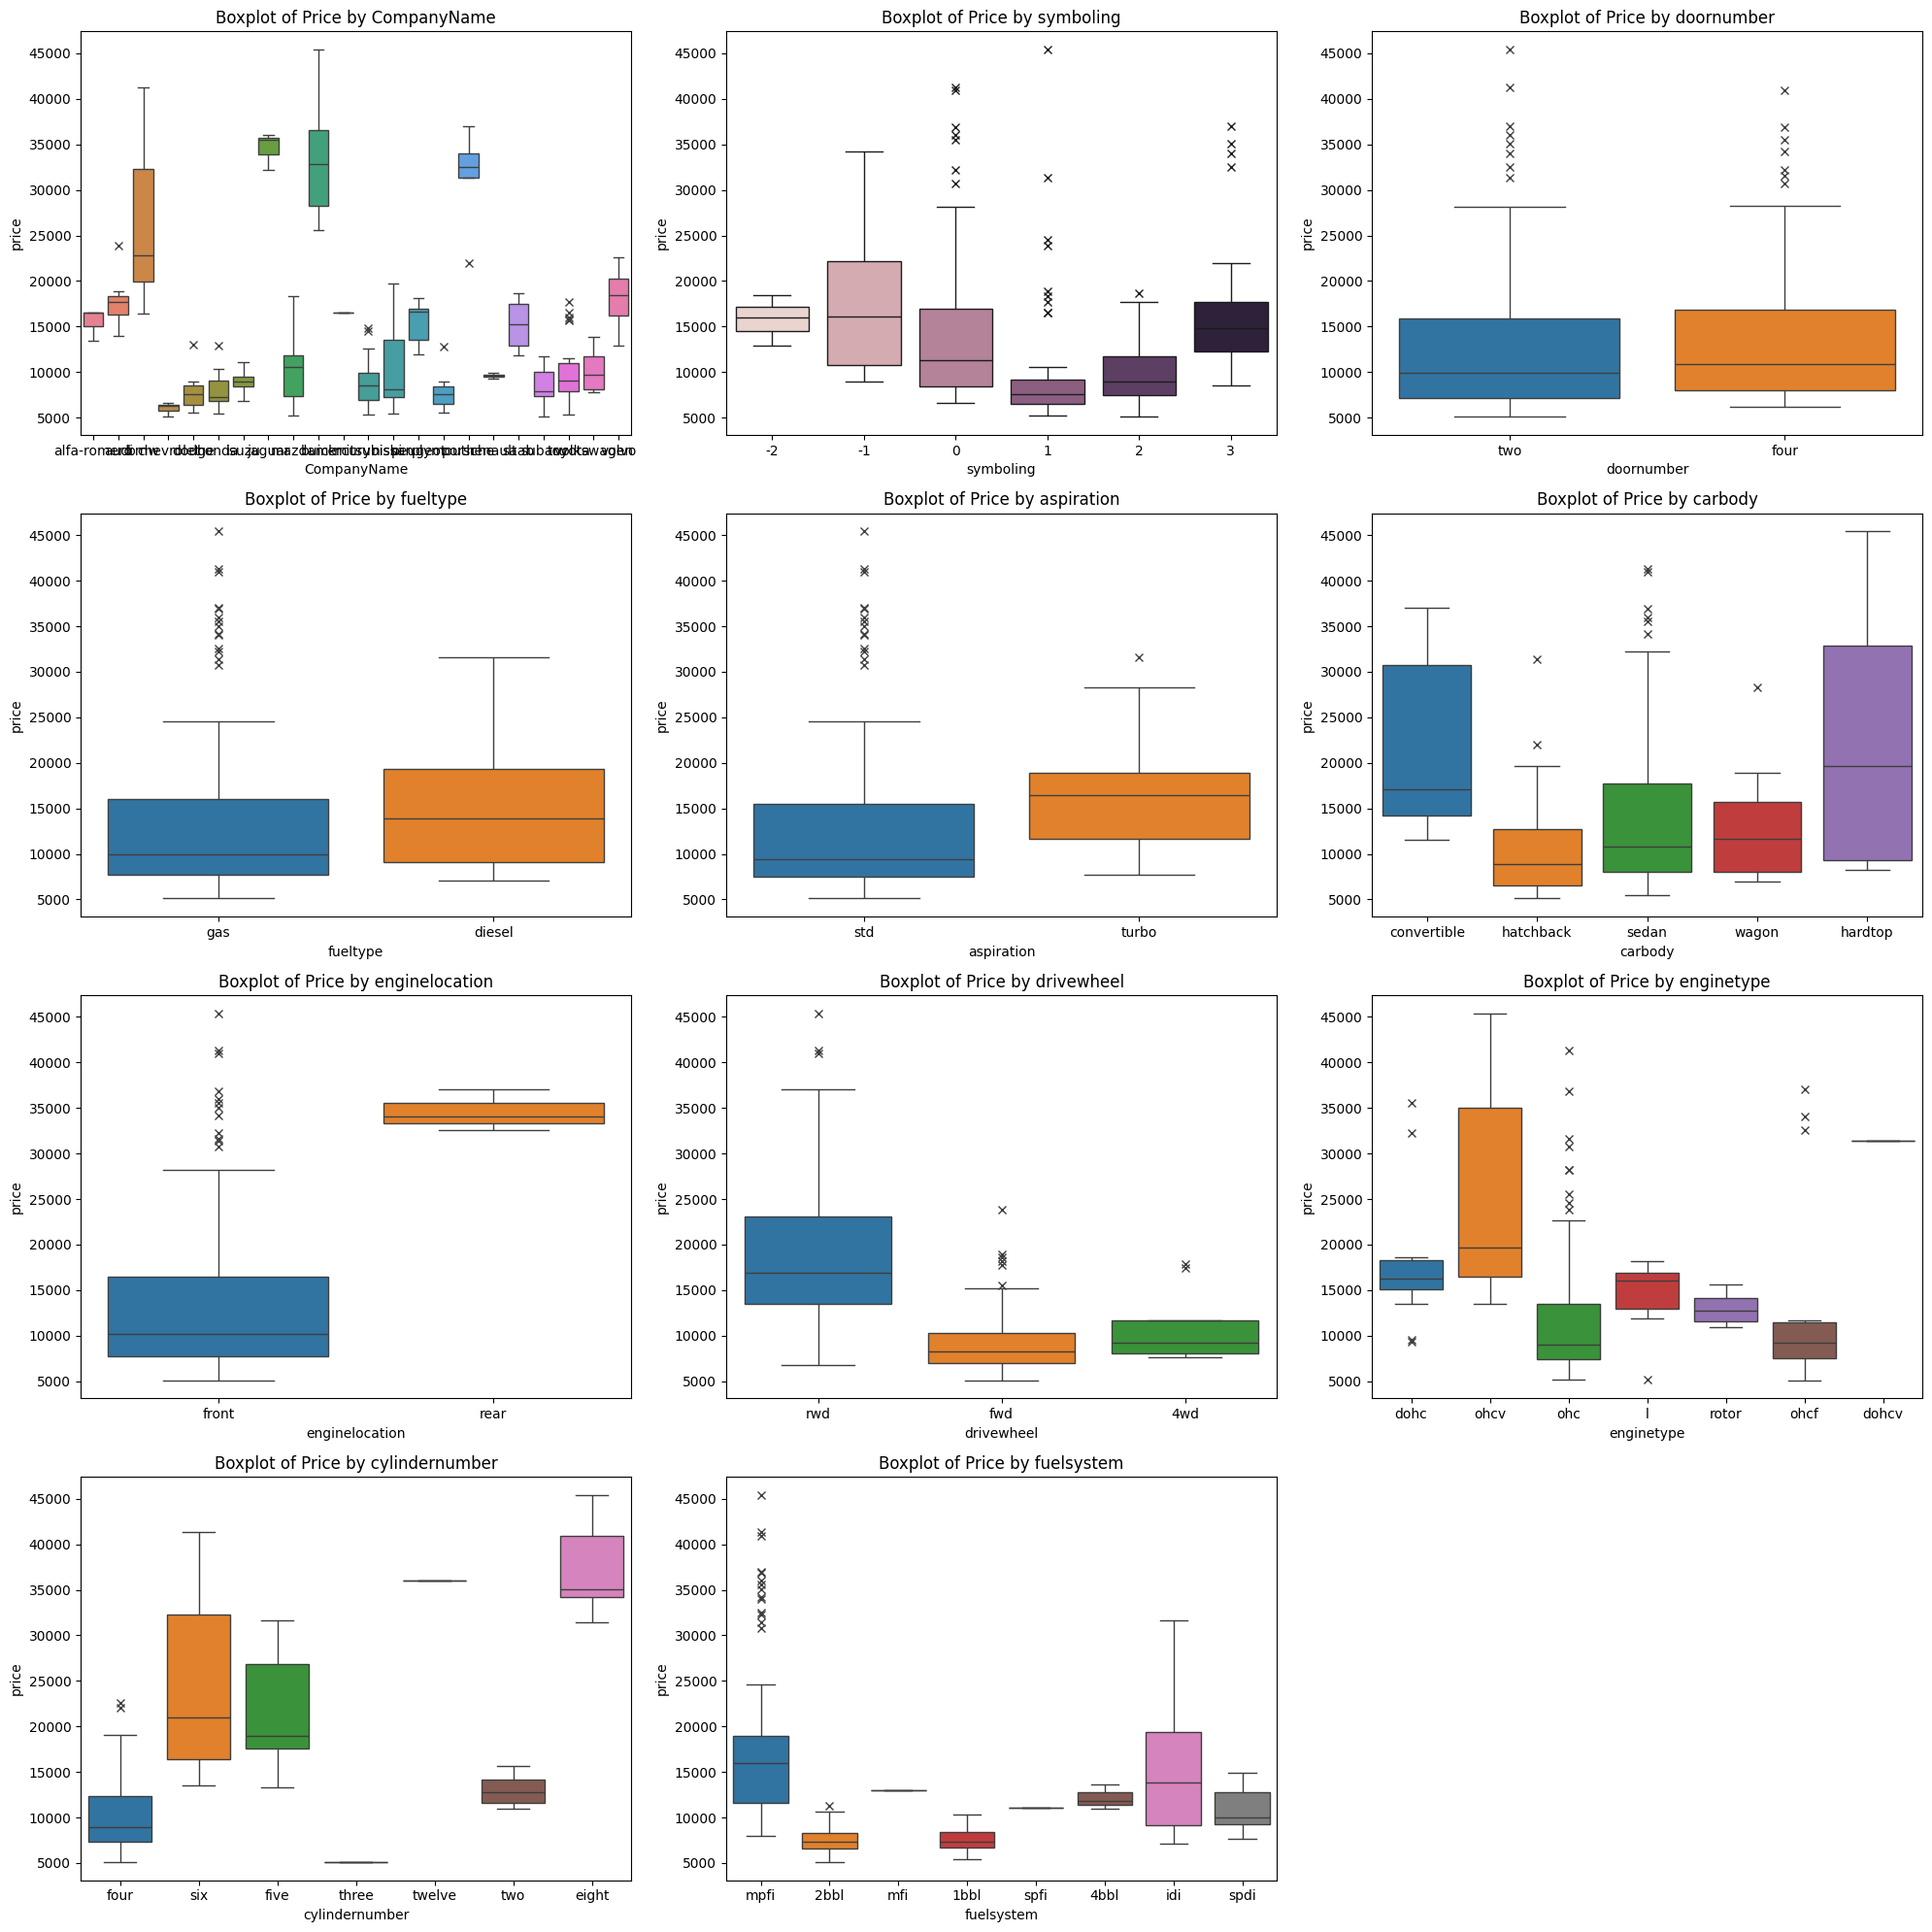

In [69]:
# Set up the figure for box plots
plt.figure(figsize=(20, 20))

# Create box plots
for i, feature in enumerate(categorical_features):
    plt.subplot(4, 3, i + 1)
    sns.boxplot(y='price', hue=feature, x=feature, data=cars,
                legend=False, flierprops={'marker': 'x'})
    plt.title(f'Boxplot of Price by {feature}')

plt.tight_layout()
plt.show()

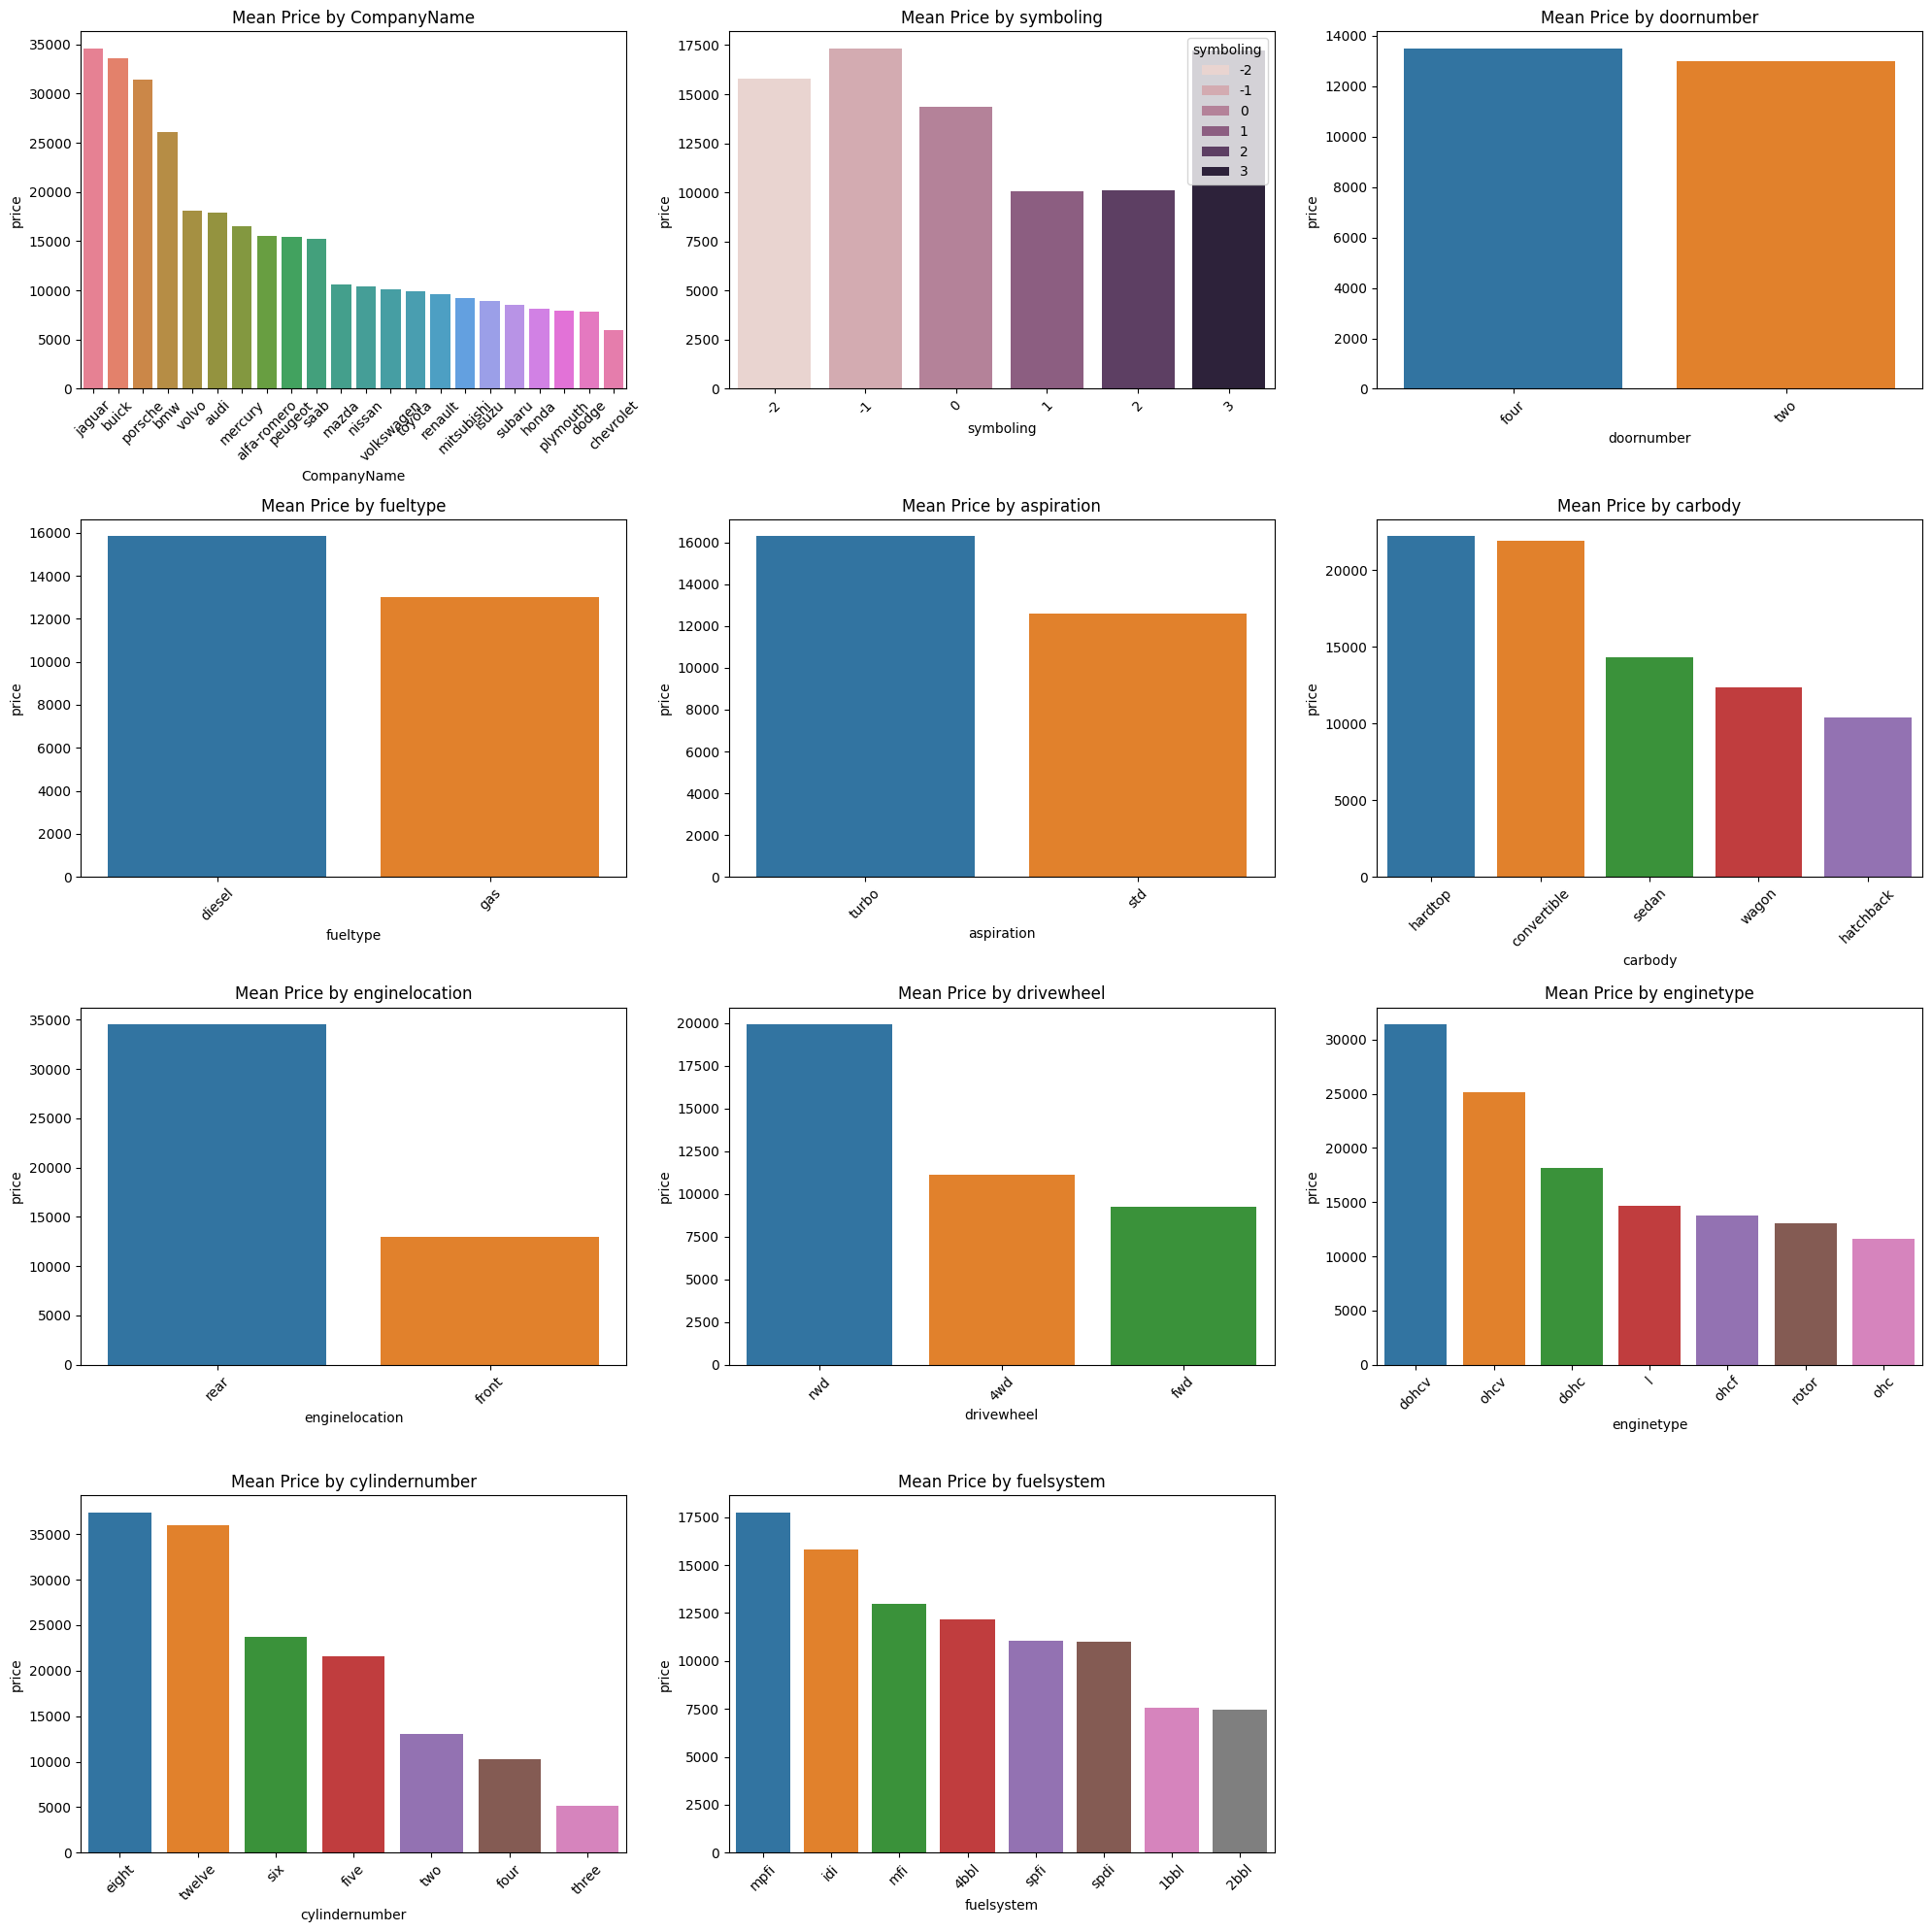

In [70]:
plt.figure(figsize=(20, 20))

# Create bar plots for each categorical feature
for i, feature in enumerate(categorical_features):
    plt.subplot(4, 3, i + 1)
    
    # Calculate the mean price for each category and sort it in descending order
    mean_price = cars.groupby(feature)['price'].mean().sort_values(ascending=False).reset_index()
    
    # Create a bar plot
    sns.barplot(x=feature, y='price', data=mean_price, estimator=lambda x: x.mean(), hue=feature)
    plt.title(f'Mean Price by {feature}')
    plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility

plt.tight_layout()
plt.show()

In [71]:
categorical_filtered = ['CompanyName', 'fueltype', 'aspiration', 'carbody', 'enginelocation', 'drivewheel', 'enginetype', 'cylindernumber']
categorical_filtered

['CompanyName',
 'fueltype',
 'aspiration',
 'carbody',
 'enginelocation',
 'drivewheel',
 'enginetype',
 'cylindernumber']

After visualization of the categorical features here are some of the insights:

- **CompanyName**: There is a noticeable difference in mean prices across different car manufacturers, which suggests that CompanyName could be a useful feature, although it may need to be encoded appropriately.

- **doornumber**: The difference in mean price between cars with two and four doors is relatively small. This feature may have low predictive power for price.

- **fueltype**: There is a noticeable price difference between diesel and gas cars. fueltype could be useful.

- **aspiration**: There is a difference in mean price between turbo and standard aspiration, so aspiration could be a useful feature.

- **carbody**: Different body styles show distinct mean prices, indicating that carbody may contribute to price prediction.

- **enginelocation**: A significant price difference exists between front and rear engine locations. enginelocation might be an important feature.

- **drivewheel**: The mean prices vary by drive type (e.g., rwd, fwd, 4wd), so drivewheel could be a useful feature.

- **enginetype**: There are noticeable price variations across different engine types, so enginetype might also be a useful predictor.

- **cylindernumber**: The mean price varies with the number of cylinders, suggesting cylindernumber could be valuable.

- **fuelsystem**: While there is some variation in mean price across different fuel systems, it is relatively minor, indicating fuelsystem might be less significant.

#### 3. Visualizing Continuous Data

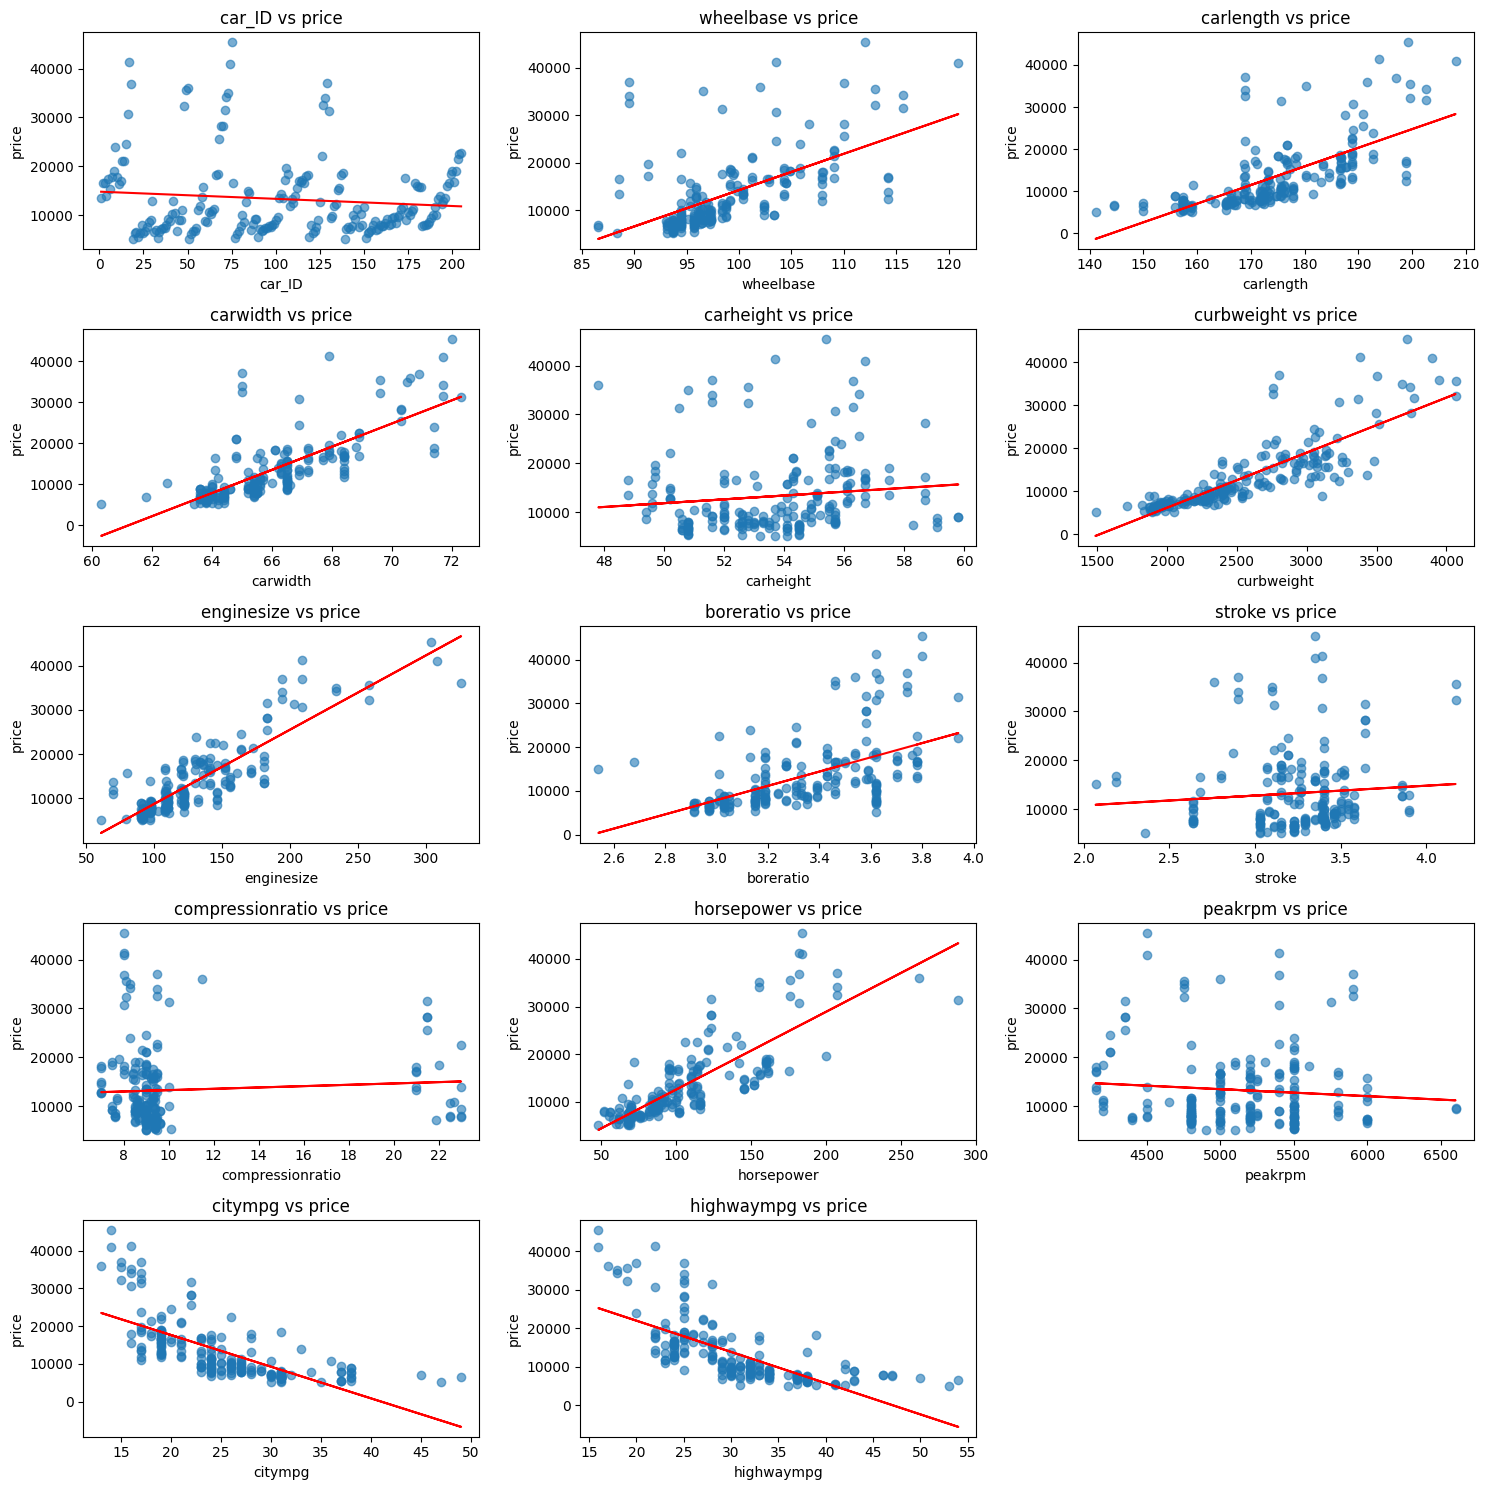

In [72]:
# Using 'cars' as the dataset
target_variable = 'price'
features = [
    'car_ID', 'wheelbase', 'carlength', 'carwidth', 'carheight',
    'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio',
    'horsepower', 'peakrpm', 'citympg', 'highwaympg'
]

# Define the grid dimensions
n_cols = 3
n_rows = int(np.ceil(len(features) / n_cols))

# Create a grid of subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 3 * n_rows))
axes = axes.flatten()

for idx, column in enumerate(features):
    # Scatter plot
    axes[idx].scatter(cars[column], cars[target_variable], alpha=0.6)
    
    # Regression line
    m, b = np.polyfit(cars[column], cars[target_variable], 1)
    axes[idx].plot(cars[column], m * cars[column] + b, color='red')
    
    # Set titles and labels
    axes[idx].set_title(f'{column} vs {target_variable}')
    axes[idx].set_xlabel(column)
    axes[idx].set_ylabel(target_variable)

# Remove empty subplots if there are any
for i in range(len(features), len(axes)):
    fig.delaxes(axes[i])

# Layout adjustment
plt.tight_layout()
plt.show()

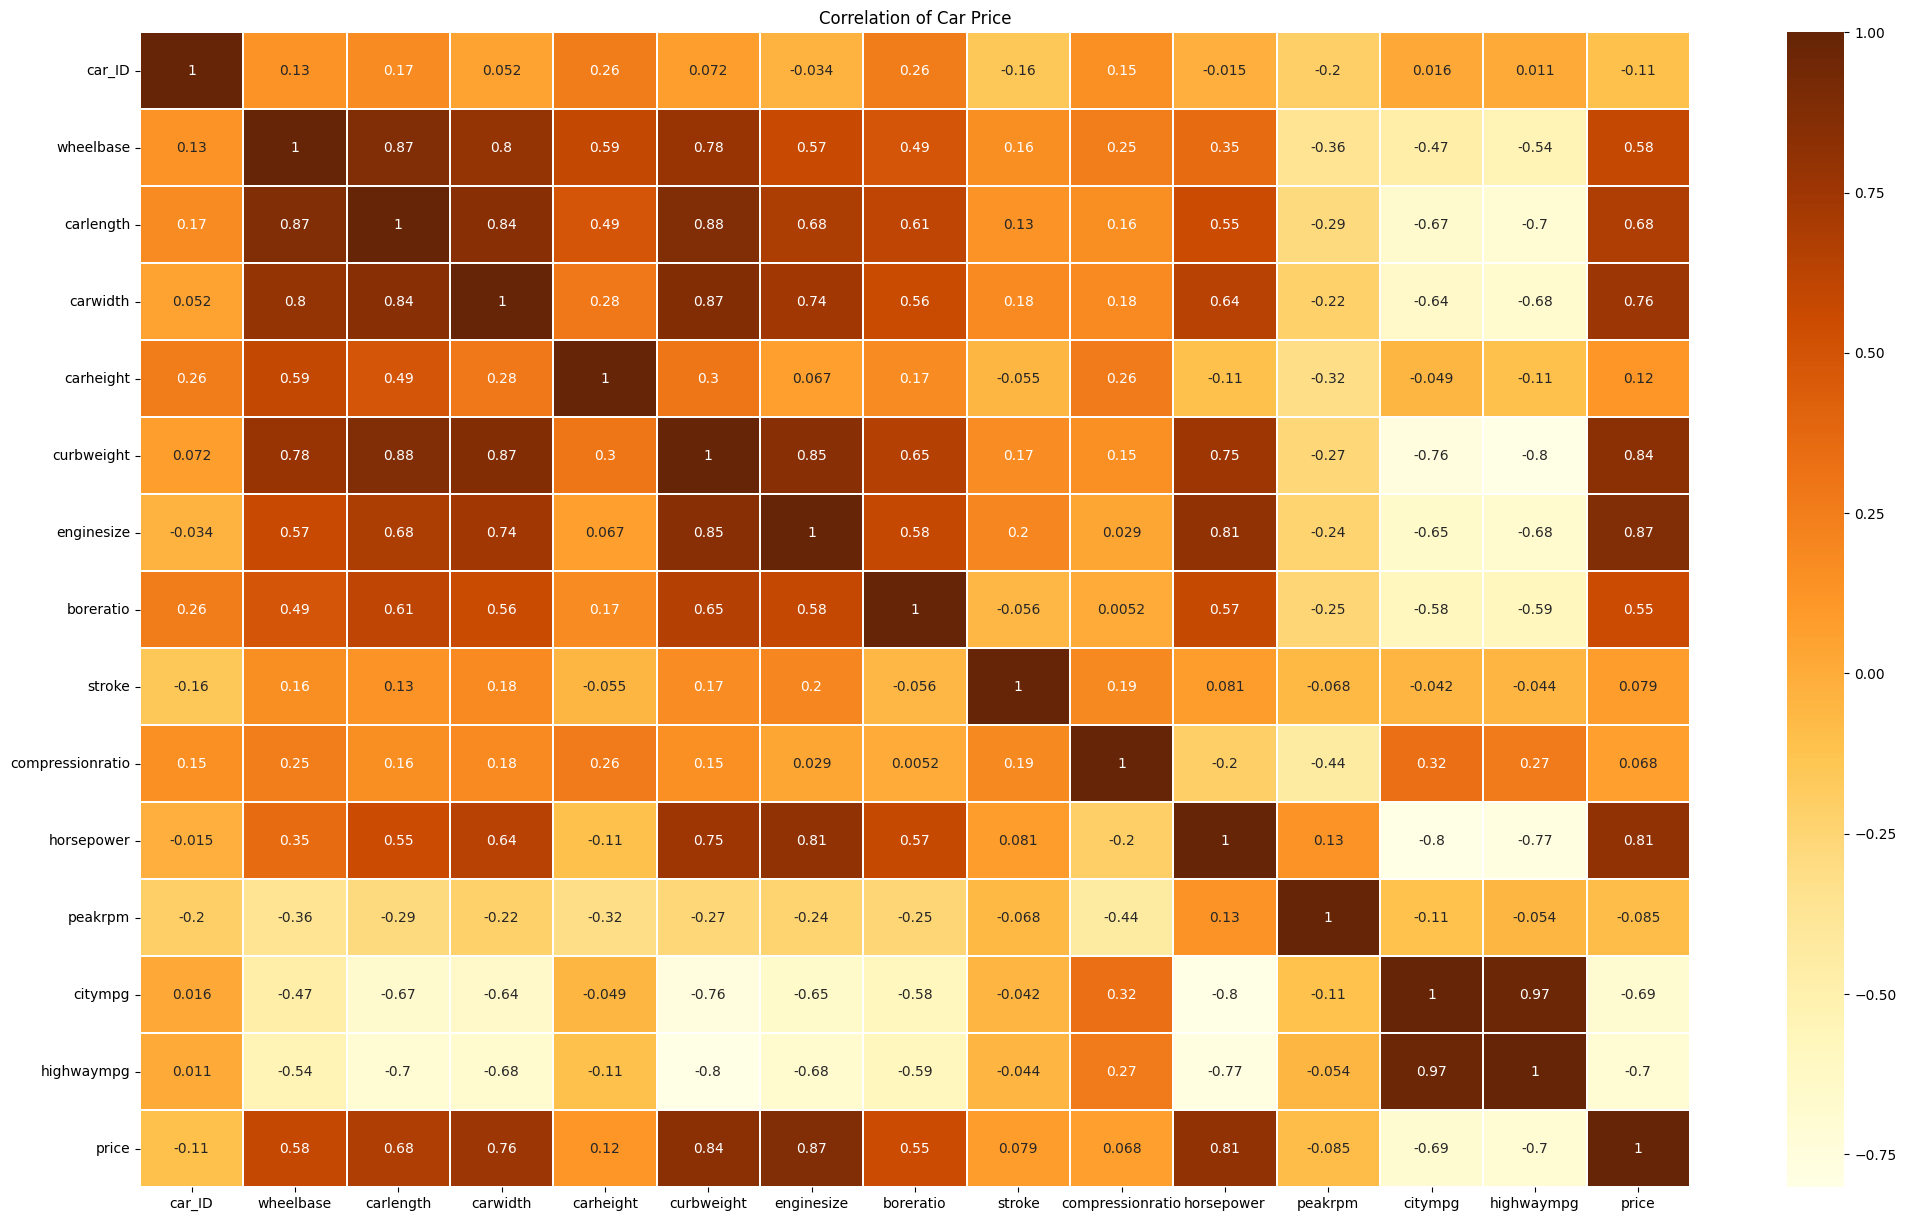

In [73]:
data_corr=cars.select_dtypes(include=['int64','float64']).corr()
plt.figure(figsize=(25,15))
sns.heatmap(data_corr,annot=True,cmap='YlOrBr', linewidths=0.01)
plt.title('Correlation of Car Price')
plt.show()

In [74]:
data_corr['price'][(data_corr['price'] > 0.5) | (data_corr['price'] < -0.5)].sort_values(ascending=False)

price         1.000000
enginesize    0.874145
curbweight    0.835305
horsepower    0.808139
carwidth      0.759325
carlength     0.682920
wheelbase     0.577816
boreratio     0.553173
citympg      -0.685751
highwaympg   -0.697599
Name: price, dtype: float64

In [75]:
continuous_filtered = data_corr['price'][(data_corr['price'] > 0.5) | (data_corr['price'] < -0.5)].index
continuous_filtered

Index(['wheelbase', 'carlength', 'carwidth', 'curbweight', 'enginesize',
       'boreratio', 'horsepower', 'citympg', 'highwaympg', 'price'],
      dtype='object')

After visualizing the continuous features, here are some insights:

- **curbweight** (correlation ~0.84): This has a strong positive correlation with price, indicating that heavier cars tend to be more expensive.
- **enginesize** (correlation ~0.87): This feature shows a very strong positive correlation with price, making it an essential predictor.
- **boreratio** (correlation ~0.55): This feature has a moderate positive correlation with price, suggesting that cars with a higher bore ratio
- **horsepower** (correlation ~0.81): Higher horsepower is associated with a higher price, suggesting it is an influential predictor.
- **carlength** (correlation ~0.68): This feature also has a moderate positive correlation with price, suggesting that longer cars are generally more expensive.
- **carwidth** (correlation ~0.76): This feature also has a strong positive correlation with price, suggesting that wider cars are generally more expensive.
- **wheelbase** (correlation ~0.58): Moderate positive correlation, which could still contribute useful information to the model.
- **citympg** and **highwaympg** (correlations ~-0.7): Both features have a strong negative correlation with price, indicating that cars with higher fuel efficiency tend to be less expensive.
<br>

After visualization here are the features to be retained for building the model:

Categorical Features
1. CompanyName
2. fueltype
3. aspiration
4. carbody
5. enginelocation
6. drivewheel
7. enginetype
8. cylindernumber

Continuous Features
1. curbweight
2. enginesize
3. boreratio
4. horsepower
5. carlength
6. carwidth
7. wheelbase
8. citympg
9. highwaympg

## Feature Engineering

This section is for converting categorical data to numerical using One Hot Encoding and Label Encoding. Also this is where we wil drop the unnecessary features based on the insight provided from the Exploratory Data Analysis.

In [76]:
cat_sig = ['CompanyName', 'fueltype', 'aspiration', 'carbody', 'enginelocation', 'drivewheel', 'enginetype', 'cylindernumber']
con_sig = ['wheelbase', 'carlength', 'carwidth', 'curbweight', 'enginesize','boreratio', 'horsepower', 'citympg', 'highwaympg', 'price']

In [77]:
cars[con_sig].head()

,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,citympg,highwaympg,price
0,88.6,168.8,64.1,2548,130,3.47,111,21,27,13495.0
1,88.6,168.8,64.1,2548,130,3.47,111,21,27,16500.0
2,94.5,171.2,65.5,2823,152,2.68,154,19,26,16500.0
3,99.8,176.6,66.2,2337,109,3.19,102,24,30,13950.0
4,99.4,176.6,66.4,2824,136,3.19,115,18,22,17450.0


#### 1. Dropping unncessary features

In [78]:
cars.head()

,CompanyName,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,alfa-romero,1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,alfa-romero,2,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,alfa-romero,3,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,audi,4,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,audi,5,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [79]:
cars = cars.loc[:, cat_sig + con_sig]
cars.head()

,CompanyName,fueltype,aspiration,carbody,enginelocation,drivewheel,enginetype,cylindernumber,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,citympg,highwaympg,price
0,alfa-romero,gas,std,convertible,front,rwd,dohc,four,88.6,168.8,64.1,2548,130,3.47,111,21,27,13495.0
1,alfa-romero,gas,std,convertible,front,rwd,dohc,four,88.6,168.8,64.1,2548,130,3.47,111,21,27,16500.0
2,alfa-romero,gas,std,hatchback,front,rwd,ohcv,six,94.5,171.2,65.5,2823,152,2.68,154,19,26,16500.0
3,audi,gas,std,sedan,front,fwd,ohc,four,99.8,176.6,66.2,2337,109,3.19,102,24,30,13950.0
4,audi,gas,std,sedan,front,4wd,ohc,five,99.4,176.6,66.4,2824,136,3.19,115,18,22,17450.0


#### 2. Categorical Feature Engineering


Converting cylindernumber from object datatype to numerical.

In [80]:
cars['cylindernumber'] = cars['cylindernumber'].replace({'four': 4, 'six': 6, 'five': 5, 'eight': 8, 'two': 2, 'three': 3, 'twelve': 12}).astype('int64')
cars[cat_sig].head()

,CompanyName,fueltype,aspiration,carbody,enginelocation,drivewheel,enginetype,cylindernumber
0,alfa-romero,gas,std,convertible,front,rwd,dohc,4
1,alfa-romero,gas,std,convertible,front,rwd,dohc,4
2,alfa-romero,gas,std,hatchback,front,rwd,ohcv,6
3,audi,gas,std,sedan,front,fwd,ohc,4
4,audi,gas,std,sedan,front,4wd,ohc,5


Converting other categorical features to numerical using One Hot Encoding

In [81]:
# Exclude cylindernumber for One Hot Encoding

cat_ohe = ['CompanyName', 'fueltype', 'aspiration', 'carbody', 'enginelocation', 'drivewheel', 'enginetype']

cars_final = pd.get_dummies(cars, columns=cat_ohe, dtype='int64')

cars_final.head()

,cylindernumber,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,citympg,highwaympg,price,CompanyName_alfa-romero,CompanyName_audi,CompanyName_bmw,CompanyName_buick,CompanyName_chevrolet,CompanyName_dodge,CompanyName_honda,CompanyName_isuzu,CompanyName_jaguar,CompanyName_mazda,CompanyName_mercury,CompanyName_mitsubishi,CompanyName_nissan,CompanyName_peugeot,CompanyName_plymouth,CompanyName_porsche,CompanyName_renault,CompanyName_saab,CompanyName_subaru,CompanyName_toyota,CompanyName_volkswagen,CompanyName_volvo,fueltype_diesel,fueltype_gas,aspiration_std,aspiration_turbo,carbody_convertible,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,enginelocation_front,enginelocation_rear,drivewheel_4wd,drivewheel_fwd,drivewheel_rwd,enginetype_dohc,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor
0,4,88.6,168.8,64.1,2548,130,3.47,111,21,27,13495.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0
1,4,88.6,168.8,64.1,2548,130,3.47,111,21,27,16500.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0
2,6,94.5,171.2,65.5,2823,152,2.68,154,19,26,16500.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0
3,4,99.8,176.6,66.2,2337,109,3.19,102,24,30,13950.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0
4,5,99.4,176.6,66.4,2824,136,3.19,115,18,22,17450.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0


Moving price to the rightmost column

In [82]:
# Move 'price' column to the end
cols = list(cars_final.columns)
# Remove 'price' from its current position
cols.remove('price')
# Append 'price' to the end of the list
cols.append('price')

cars_final = cars_final[cols]

cars_final.head()

,cylindernumber,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,citympg,highwaympg,CompanyName_alfa-romero,CompanyName_audi,CompanyName_bmw,CompanyName_buick,CompanyName_chevrolet,CompanyName_dodge,CompanyName_honda,CompanyName_isuzu,CompanyName_jaguar,CompanyName_mazda,CompanyName_mercury,CompanyName_mitsubishi,CompanyName_nissan,CompanyName_peugeot,CompanyName_plymouth,CompanyName_porsche,CompanyName_renault,CompanyName_saab,CompanyName_subaru,CompanyName_toyota,CompanyName_volkswagen,CompanyName_volvo,fueltype_diesel,fueltype_gas,aspiration_std,aspiration_turbo,carbody_convertible,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,enginelocation_front,enginelocation_rear,drivewheel_4wd,drivewheel_fwd,drivewheel_rwd,enginetype_dohc,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,price
0,4,88.6,168.8,64.1,2548,130,3.47,111,21,27,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,13495.0
1,4,88.6,168.8,64.1,2548,130,3.47,111,21,27,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,16500.0
2,6,94.5,171.2,65.5,2823,152,2.68,154,19,26,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,16500.0
3,4,99.8,176.6,66.2,2337,109,3.19,102,24,30,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,13950.0
4,5,99.4,176.6,66.4,2824,136,3.19,115,18,22,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,17450.0


In [83]:
cars_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 54 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   cylindernumber           205 non-null    int64  
 1   wheelbase                205 non-null    float64
 2   carlength                205 non-null    float64
 3   carwidth                 205 non-null    float64
 4   curbweight               205 non-null    int64  
 5   enginesize               205 non-null    int64  
 6   boreratio                205 non-null    float64
 7   horsepower               205 non-null    int64  
 8   citympg                  205 non-null    int64  
 9   highwaympg               205 non-null    int64  
 10  CompanyName_alfa-romero  205 non-null    int64  
 11  CompanyName_audi         205 non-null    int64  
 12  CompanyName_bmw          205 non-null    int64  
 13  CompanyName_buick        205 non-null    int64  
 14  CompanyName_chevrolet    2

## Building the Model
This is the section where we will build our Linear Regression Model.

#### 1. Getting X and y variables

In [84]:
X = cars_final.iloc[:,:-1].values
pd.DataFrame(X)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52
0,4.0,88.6,168.8,64.1,2548.0,130.0,3.47,111.0,21.0,27.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,4.0,88.6,168.8,64.1,2548.0,130.0,3.47,111.0,21.0,27.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,6.0,94.5,171.2,65.5,2823.0,152.0,2.68,154.0,19.0,26.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,4.0,99.8,176.6,66.2,2337.0,109.0,3.19,102.0,24.0,30.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,5.0,99.4,176.6,66.4,2824.0,136.0,3.19,115.0,18.0,22.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,4.0,109.1,188.8,68.9,2952.0,141.0,3.78,114.0,23.0,28.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
201,4.0,109.1,188.8,68.8,3049.0,141.0,3.78,160.0,19.0,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
202,6.0,109.1,188.8,68.9,3012.0,173.0,3.58,134.0,18.0,23.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
203,6.0,109.1,188.8,68.9,3217.0,145.0,3.01,106.0,26.0,27.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [85]:
y = cars_final.iloc[:,-1].values
pd.DataFrame(y)

,0
0,13495.0
1,16500.0
2,16500.0
3,13950.0
4,17450.0
...,...
200,16845.0
201,19045.0
202,21485.0
203,22470.0


Train test split

In [86]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=69)
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (164, 53)
X_test shape: (41, 53)
y_train shape: (164,)
y_test shape: (41,)


#### 2. Training Linear Regression Model

In [87]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

#### 3. Inference

In [88]:
data_sample = np.array([[4, 88.6, 168.8, 64.1, 2548, 130, 3.47, 111, 21, 27, 
                      1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
                      0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 
                      1, 1, 0, 0, 0, 0, 0, 0]])
predicted_price = lr.predict(data_sample)
print(f"Predicted Price: {round(predicted_price[0],2)}")
price_row_1 = cars_final.iloc[0]['price']
print(f"Actual Price: {price_row_1}")
print(f"Difference: {price_row_1 - predicted_price}")

Predicted Price: 13647.55
Actual Price: 13495.0
Difference: [-152.55121761]


In [89]:
y_pred = lr.predict(X_test)
y_pred

array([35007.55477017, 30557.75712889, 17657.04984859, 11416.73946059,
        6381.91592547, 13412.782285  , 33829.37496117,  6359.9832737 ,
        5992.81256663,  6464.90087023,  6843.14642654,  9153.46719542,
        6341.39279118, 18055.05890396,  7670.52285254, 21129.72525036,
       25908.02285801, 31372.81899926, 11585.88142271, 12983.28286777,
       14747.28290421, 17526.73547125,  5424.02657892,  9390.30549478,
       10282.64301764,  7875.51114401, 11898.04764469,  6254.82654555,
       16913.07711897,  6591.16960676, 19436.43853643, 19273.42487174,
        6037.19352755,  7794.37100871,  8303.71191817, 10826.73810855,
        5130.30503973,  8766.5633608 , 13647.55121761,  8979.55151067,
        5327.79855687])

In [90]:
pred_df = pd.DataFrame({'Actual Value': y_test, 'Predicted Value': y_pred, 'Difference': y_test - y_pred})
pred_df = pred_df.round(2)

# Reset index to start at 1
pred_df.index = range(1, len(pred_df) + 1)
pred_df

,Actual Value,Predicted Value,Difference
1,32250.0,35007.55,-2757.55
2,28248.0,30557.76,-2309.76
3,15750.0,17657.05,-1907.05
4,13645.0,11416.74,2228.26
5,5499.0,6381.92,-882.92
6,15645.0,13412.78,2232.22
7,32528.0,33829.37,-1301.37
8,5399.0,6359.98,-960.98
9,7799.0,5992.81,1806.19
10,9258.0,6464.90,2793.10


## Evaluation of the Model

##### R² Score

In [91]:
r2 = r2_score(y_test, y_pred)*100
print(f"R² Score: {r2:.2f}")

R² Score: 93.08


##### Mean Absolute Error (MAE)

In [92]:
# Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae:.2f}")

Mean Absolute Error (MAE): 1686.60


##### Mean Squared Error (MSE)

In [93]:
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse:.2f}")

Mean Squared Error (MSE): 3926875.33


##### Root Mean Squared Error (RMSE)

In [94]:
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

Root Mean Squared Error (RMSE): 1981.63


##### Plotting of the Predicted vs. Actual Price

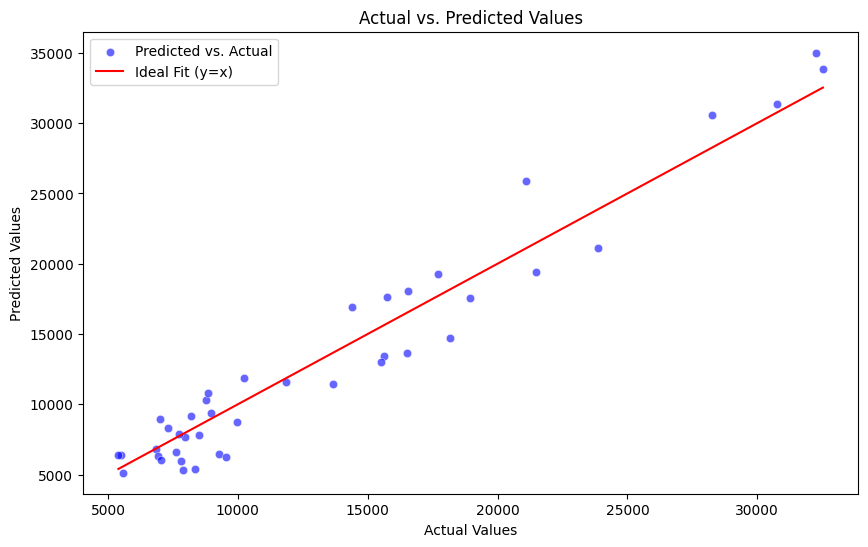

In [95]:
# Create a scatter plot for actual vs. predicted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, color="blue", label="Predicted vs. Actual", alpha=0.6)
sns.lineplot(x=y_test, y=y_test, color="red", label="Ideal Fit (y=x)")

# Set plot labels and title
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.legend()
plt.show()

##### Summary of Evaluation

In [96]:
# Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae:.2f}")

# Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse:.2f}")

# Root Mean Squared Error
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

# R² Score
r2 = r2_score(y_test, y_pred)*100
print(f"R² Score: {r2:.2f}")

Mean Absolute Error (MAE): 1686.60
Mean Squared Error (MSE): 3926875.33
Root Mean Squared Error (RMSE): 1981.63
R² Score: 93.08
